# 2-1. 훈련 세트와 테스트 세트
모델을 훈련시키는 훈련 세트와 모델을 평가하기 위한 테스트 세트

- bream, smelt 데이터를 훈련시킨 뒤 훈련에 사용한 일부 데이터를 예측에도 사용한다면 당연히 정확도는 100%에 가까울 수밖에 없음   
=> 훈련 데이터와 테스트 데이터로 나눠서 훈련용과 평가용을 구분하여 모델의 정확도를 파악해야함
- 훈련 데이터와 테스트 데이터는 앞과 동일하게 input과 target으로 구성, input은 feature의 집합

In [ ]:
 # data source : https://gist.github.com/rickiepark/b90b9f725890653e69a1a52943671c62
 fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = [[l,w] for l,w in zip(fish_length, fish_weight)]
fish_target = [0]*35+[1]*14
# 총 49개의 sample로 구성, 이중 train 세트는 35개, test 세트는 14개
print(fish_data[0], fish_data[:5])

[25.4, 242.0] [[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


### Sampling Bais, Numpy

- Numpy : 배열array 라이브러리   
고차원의 배열을 손쉽게 조작하는 도구를 제공
- np.array(list.py) -> array
- array.shape 
- array indexing

In [ ]:
import numpy as np
# np.array()로 파이썬 list를 array형태로 변환
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
# shape는 array의 배열 크기를 알려주는 속성 : 1차원이면 (n,) 2차원이면 (n,m) 3차원이면 (n,m,l)
print(input_arr.shape)

(49, 2)


In [ ]:
# numpy 배열이 준비되었으니 랜덤하게 샘플을 선택해 train용과 test용으로 구분해야 함
# 이때 input_arr와 target_arr에서의 동일한 index는 동시에 선택되어야 함, 이게 꼬이면 input-answer가 뒤틀리는 것으로 큰 오류 야기
# 이를 위해 두 array에 index를 할당해줘야 함
index = np.arange(49) #49개의 0~48의 정수 array 생성
seed = 42
np.random.seed(seed)
np.random.shuffle(index)   # index array를 무작위로 섞음
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [ ]:
# 배열 인덱싱 : 여러 개의 인덱스로 한 번에 여러 개의 원소(샘플)를 선택
print("두 번째 input smp: ", input_arr[1], "\n", "두, 네 번째 input smp: ", input_arr[[1,3]], "\n", "두, 세 번째 input smp: ", input_arr[1:3])

두 번째 input smp:  [ 26.3 290. ] 
 두, 네 번째 input smp:  [[ 26.3 290. ]
 [ 29.  363. ]] 
 두, 세 번째 input smp:  [[ 26.3 290. ]
 [ 26.5 340. ]]


In [ ]:
# train_set 준비 : shuffle된 index배열의 처음 35개를 input_arr와 target_arr에 전달하여 35개의 train set를 만듦
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
print("셔플되기 전인 input_arr의 46th smp인 ", input_arr[45], "과 셔플된 후 train_input의 2nd smp인", train_input[1], "은 같습니다")

셔플되기 전인 input_arr의 46th smp인  [12.4 13.4] 과 셔플된 후 train_input의 2nd smp인 [12.4 13.4] 은 같습니다


In [ ]:
# test_set 준비
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

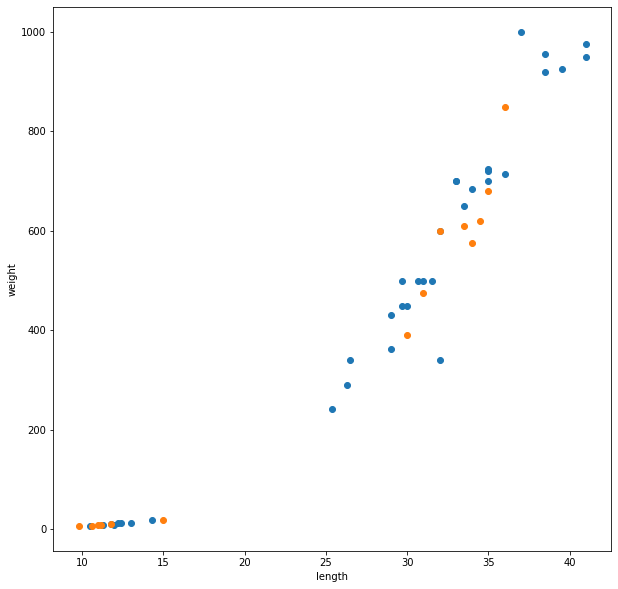

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize=(10,10))
plt.scatter(train_input[:,0], train_input[:,1])   # train_input 중 0번 column(길이)을 x축에, 1번 column(무게)을 y축에 배치
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 훈련 세트와 테스트 세트로 모델링

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
# 정확도가 1이므로 test set의 모든 데이터를 정확하게 맞춤

In [ ]:
kn.predict(test_input)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
test_target

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
for idx, dif in enumerate(kn.predict(test_input) - test_target) :
  if dif == 0 :
    print(idx,": right")
  else :
    print(idx,": wrong")

0 : right
1 : right
2 : right
3 : right
4 : right
5 : right
6 : right
7 : right
8 : right
9 : right
10 : right
11 : right
12 : right
13 : right


# 2-2. 데이터 전처리
데이터 전처리, 표준점수, 브로드캐스딩(np)

### Numpy로 데이터 준비
- column_stack(), np.ones(), np.zeors(), np.concatenate()

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np
np.column_stack(([1,2,3],[4,5,6]))
# np.column_stack((list1,list2,...))은 전달받은 list들을 같은 index끼리 추출하여 묶어 새로운 array를 만드는 함수로 앞서 for+zip()과 같은 역할
# A = [a1, a2, ...], B = [b1, b2, ...] => result = [[a1,b1],[a2,b2],...]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
fish_data = np.column_stack((fish_length,fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
# np.ones(N), np.zeros(N)는 N개 만큼의 1, 0으로 이루어진 배열을 생성
# np.concatenate( (A, B) )는 배열 A와 B를 결합시키는 함수로 list상 + 같은 역할
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### 사이킷런으로 훈련 세트와 테스트 세트 자동으로 나누기
- train_test_split()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state =42)
# train_test_split( INPUT, TARGET, random_state=) : 입력 데이터를 train_input과 test_input으로 나누고 타겟 데이터를 train_target과 test_target으로 랜덤하게 나눔
# 이때 25%를 테스트 세트로 떼어냄

In [ ]:
print(train_input.shape , test_input.shape)  # 2개의 feature로 구성

(36, 2) (13, 2)


훈련 세트와 테스트 세트를 각각 36, 13개로 나누었다는 의미

In [ ]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


원래 bream:smelt ratio가 2.5:1인데 test에서는 그 ratio가 3.3:1이므로 약하게 나마 **sampling bais**가 나타났다고 볼 수 있음   
=> stratify 매개변수로 이를 조정

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state =42)
# stratify = 원하는 비율을 가진 array (전체 set)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


이제 test의 b:s ratio는 2.25:1로 전체 ratio와 유사해짐

### k-nearest neighbors 분류모델의 분석 시각화 (추가)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn = kn.fit(train_input, train_target)
kn.predict([[25,150]])

array([0.])

[25, 150]의 예측값은 0, 그러나 정답은 1

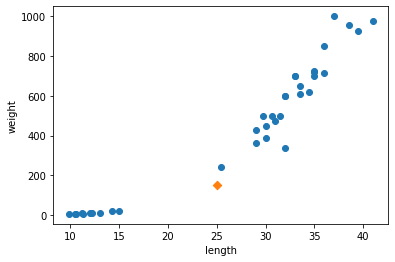

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

kneighbor() :  KNeighborClassifier 클래스에서 주어진 샘플에서 가장 가까운 이웃을 찾아주는 함수   
- 이웃까지의 거리와 해당 이웃들의 index를 return
- return_distance = False 로 하면 이웃 샘플의 index만 반환하고 거리는 반환하지 않음

In [ ]:
distances, indexes = kn.kneighbors([[25,150]])

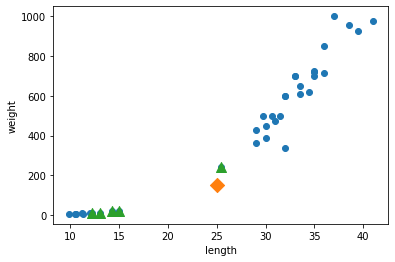

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='D', s= 100)
plt.scatter(train_input[indexes, 0], train_input[indexes, 1] , marker='^',s=100)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


분명 그래프상으로는 class 1(도미)과 더 가까운데 왜 model prediction상으로는 class 0(빙어)에 이웃이 4개나 있는 것일까?   
=> scale 차이를 반영하지 않았기 때문!

### 데이터 전처리 : 표준점수화, 브로드캐스딩

length는 10-40의 값을 가지는 데이터인데, weight는 0-1000의 값을 가지는 데이터 이므로 단순히 거리를 재면 length는 매우 낮은 결정력(가중치)을 갖는 결과가 발생   
=> length가 무의미해지는 결과


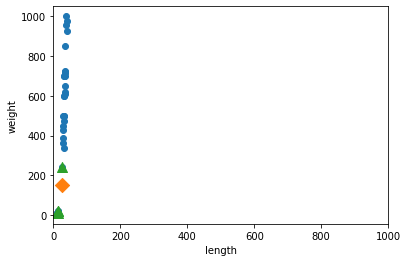

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='D', s= 100)
plt.scatter(train_input[indexes, 0], train_input[indexes, 1] , marker='^',s=100)
plt.xlim((0,1000))   # x축의 scale을 (0,1000)으로 변경
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

산점도가 사실상 일직선, 두 특성feature의 scale을 맞추는 과정이 필요 :    
**데이터 전처리(data preprocessing)**
- 표준점수(standard score)

In [ ]:
mean = np.mean(train_input, axis =0)
std = np.std(train_input, axis=0)

axis = 0 : 행을 따라 계산 (행 전체를 하나의 묶음으로 봄)   
.......  = 1 : 열을 따라 계산 (열 전체를 하나의 묶음으로 봄)



In [ ]:
train_scaled = (train_input - mean)/std

** 브로드캐스딩** : numpy 배열을 계산하는 기능
- array 안의 개별 데이터를 한 번에 계산할 수 있음
- train_input 안의 개별 데이터에 대해 각각 앞서 구한 mean 값을 빼주고 std로 나눠주는 작업을 굳이 array를 해체하지 않아도 수행 가능!!



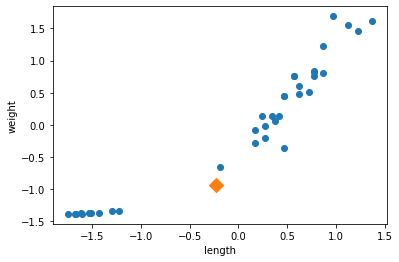

In [ ]:
new = ([25,150] - mean) / std
# 새로운 데이터 또한 전처리해야 함
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1],marker='D', s= 100)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
test_scaled = ( test_input - mean)/std
# train의 평균과 분산을 기준으로 test의 표준점수화를 해야 같은 scale로 산점도를 그릴 수 있음

In [ ]:
kn.score(test_scaled, test_target)

1.0

In [ ]:
print(kn.predict([new]))

[1.]


데이터 전처리를 거친 결과 새로운 데이터를 빙어(0)가 아닌 도미(1)로 잘 예측하고 있음!

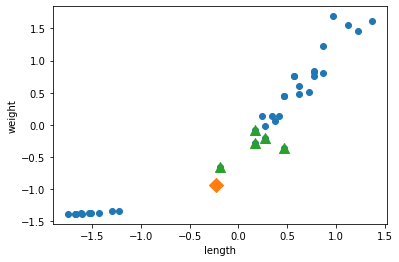

In [ ]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='D', s= 100)
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1] , marker='^',s=100)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

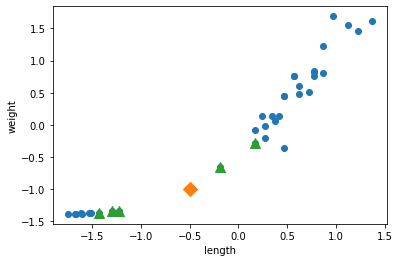

In [ ]:
# [-0.5,-1]인 새로운 데이터는 어떤 결과?
distances2, indexes2 = kn.kneighbors([[-0.5, -1]])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(-0.5, -1, marker='D', s= 100)
plt.scatter(train_scaled[indexes2, 0], train_scaled[indexes2, 1] , marker='^',s=100)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(kn.predict([[-0.5, -1]]))

[0.]
